<a href="https://colab.research.google.com/github/Jonnytan555/ML_for_Finance/blob/main/Natural_Language_Processing_with_Text_Mining_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Text Mining

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#Main techniques covered in this project

Core text processing steps<br>
  * Stop word removal<br>
  * Stemming<br>
  * TF-IDF conversion<br>




In [2]:
#Shakes.txt file can be found in this repository
shakes = open('shakes.txt')
shakes = shakes.read(5000) 

In [3]:
shakes = shakes.lower()
shakes

'the project gutenberg ebook of the complete works of william shakespeare, by\nwilliam shakespeare\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n** this is a copyrighted project gutenberg ebook, details below **\n**     please follow the copyright guidelines in this file.     **\n\ntitle: the complete works of william shakespeare\n\nauthor: william shakespeare\n\nposting date: september 1, 2011 [ebook #100]\nrelease date: january, 1994\n\nlanguage: english\n\ncharacter set encoding: ascii\n\n*** start of this project gutenberg ebook complete works--william shakespeare ***\n\n\n\n\nproduced by world library, inc., from their library of the future\n\n\n\n\nthis is the 100th etext file presented by project gutenberg, and\nis presented in cooperation with world library, inc., from 

In [4]:
import re
shakes = re.sub( "[^a-zA-Z]", " ", shakes )
shakes 

'the project gutenberg ebook of the complete works of william shakespeare  by william shakespeare  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever   you may copy it  give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org     this is a copyrighted project gutenberg ebook  details below           please follow the copyright guidelines in this file          title  the complete works of william shakespeare  author  william shakespeare  posting date  september          ebook       release date  january        language  english  character set encoding  ascii      start of this project gutenberg ebook complete works  william shakespeare         produced by world library  inc   from their library of the future     this is the    th etext file presented by project gutenberg  and is presented in cooperation with world library  inc   from their library of the future and s

In [5]:
help(re)

Help on module re:

NAME
    re - Support for regular expressions (RE).

MODULE REFERENCE
    https://docs.python.org/3.7/library/re
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides regular expression matching operations similar to
    those found in Perl.  It supports both 8-bit and Unicode strings; both
    the pattern and the strings being processed can contain null bytes and
    characters outside the US ASCII range.
    
    Regular expressions can contain both special and ordinary characters.
    Most ordinary characters, like "A", "a", or "0", are the simplest
    regular expressions; they simply match themselves.  You can
    concatenate ordinary characters, so last mat

Import *nltk* and tokenize the text.

In [6]:
import nltk
nltk.download('punkt')    # Comment out after installing
shakes = nltk.tokenize.word_tokenize(shakes)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
help(nltk)

Help on package nltk:

NAME
    nltk

DESCRIPTION
    The Natural Language Toolkit (NLTK) is an open source Python library
    for Natural Language Processing.  A free online book is available.
    (If you use the library for academic research, please cite the book.)
    
    Steven Bird, Ewan Klein, and Edward Loper (2009).
    Natural Language Processing with Python.  O'Reilly Media Inc.
    http://nltk.org/book
    
    @version: 3.2.5

PACKAGE CONTENTS
    app (package)
    book
    ccg (package)
    chat (package)
    chunk (package)
    classify (package)
    cluster (package)
    collections
    collocations
    compat
    corpus (package)
    data
    decorators
    downloader
    draw (package)
    featstruct
    grammar
    help
    inference (package)
    internals
    jsontags
    lazyimport
    metrics (package)
    misc (package)
    parse (package)
    probability
    sem (package)
    sentiment (package)
    stem (package)
    tag (package)
    tbl (package)
    test (p

Import the *Counter* library from *collections*

In [8]:
from collections import Counter

Display counts of the most common words in the text.

In [9]:
Counter(shakes).most_common(10)

[('the', 38),
 ('of', 31),
 ('and', 25),
 ('or', 25),
 ('this', 22),
 ('by', 16),
 ('is', 16),
 ('for', 16),
 ('you', 15),
 ('etext', 15)]

Remove stop words.

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words("english")
shakes = [w for w in shakes if w not in stopwords.words('english')]
Counter(shakes).most_common(10) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('etext', 15),
 ('project', 13),
 ('gutenberg', 12),
 ('shakespeare', 11),
 ('william', 8),
 ('may', 8),
 ('library', 8),
 ('complete', 7),
 ('copyright', 7),
 ('ebook', 6)]

This function stem's the tokenized words using PorterStemmer and display the 10 most common words.

In [11]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

stemmer = PorterStemmer()
stemmed = stem_tokens(shakes, stemmer)
count = Counter(stemmed)

CommonWords = count.most_common(10)
CommonWords

[('etext', 17),
 ('project', 13),
 ('gutenberg', 12),
 ('shakespear', 11),
 ('use', 9),
 ('copi', 9),
 ('william', 8),
 ('may', 8),
 ('copyright', 8),
 ('librari', 8)]

To visualize the 10 most common words the list will be converted into a dataframe of common words into a dataframe 

In [12]:
import pandas as pd
df = pd.DataFrame(CommonWords, columns=['Word', 'Count'])
df.set_index('Word', inplace=True)
df

,Count
Word,
etext,17
project,13
gutenberg,12
shakespear,11
use,9
copi,9
william,8
may,8
copyright,8


Plot the common words as a bar chart

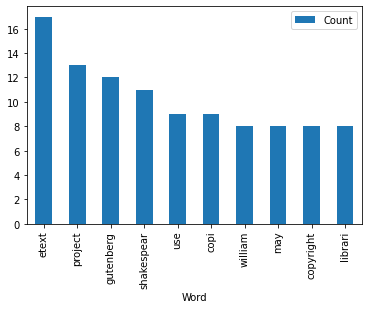

In [13]:
df.plot(kind='bar')

The following code will create a term document matrix of the following syllogism and display a term document

"All mortals die. All men are mortals. All men die."

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_set = ["All mortals die.", "All men are mortals.", "All men die."]

stop_words = stopwords.words('english')

transformer = TfidfVectorizer(stop_words=stop_words)

transformer.fit_transform(train_set).todense()

matrix([[0.70710678, 0.        , 0.70710678],
        [0.        , 0.70710678, 0.70710678],
        [0.70710678, 0.70710678, 0.        ]])

The *.get_feature_names()* method can be used to to see the words/features

In [15]:
transformer.get_feature_names()

['die', 'men', 'mortals']

The *.idf_* attribute can be used to see the inverse document frequency values

In [16]:
idf = transformer.idf_
idf

array([1.28768207, 1.28768207, 1.28768207])

The *zip()* function to combine the words with their idf values and convert into a list

In [17]:
terms_score  = zip(transformer.get_feature_names(), idf)

list(terms_score)

[('die', 1.2876820724517808),
 ('men', 1.2876820724517808),
 ('mortals', 1.2876820724517808)]